<a href="https://colab.research.google.com/github/hj201722/hj/blob/master/messy_vs_clean_room_image_classification_w_tensor_ver2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 데이터 디렉토리 설정
train_data_dir = pathlib.Path('/content/drive/MyDrive/images/train')
val_data_dir = pathlib.Path('/content/drive/MyDrive/images/val')
test_data_dir = pathlib.Path('/content/drive/MyDrive/images/test')

In [6]:
# 모델 파라미터 설정
batch_size = 16
img_width = 224
img_height = 224
num_classes = 2
epochs = 50
class_names = ['clean', 'messy']

# 데이터 제너레이터 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 422 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [7]:
# 모델 정의
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# 모델 저장
model.save('/content/drive/MyDrive/my_model_v2.2.h5')

Epoch 1/50
27/27 [==============================] - 135s 5s/step - loss: 1.8044 - accuracy: 0.5403 - val_loss: 0.6612 - val_accuracy: 0.6491
Epoch 2/50
27/27 [==============================] - 9s 334ms/step - loss: 0.6145 - accuracy: 0.6919 - val_loss: 0.6589 - val_accuracy: 0.5439
Epoch 3/50
27/27 [==============================] - 7s 262ms/step - loss: 0.5099 - accuracy: 0.7749 - val_loss: 0.7820 - val_accuracy: 0.6140
Epoch 4/50
27/27 [==============================] - 9s 324ms/step - loss: 0.5131 - accuracy: 0.7630 - val_loss: 0.6674 - val_accuracy: 0.6842
Epoch 5/50
27/27 [==============================] - 8s 286ms/step - loss: 0.5004 - accuracy: 0.7749 - val_loss: 0.8136 - val_accuracy: 0.6842
Epoch 6/50
27/27 [==============================] - 7s 260ms/step - loss: 0.5408 - accuracy: 0.7559 - val_loss: 0.6915 - val_accuracy: 0.6842
Epoch 7/50
27/27 [==============================] - 9s 348ms/step - loss: 0.4718 - accuracy: 0.7962 - val_loss: 0.7442 - val_accuracy: 0.6842
Epoch 8

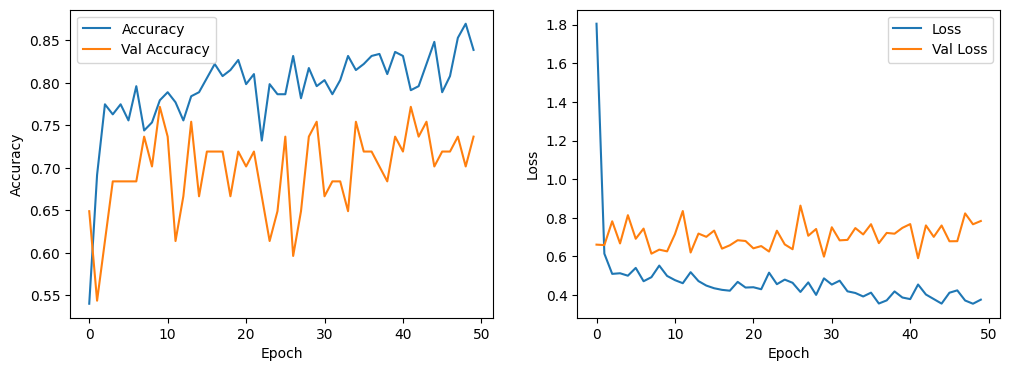

1/1 [==============================] - 0s 23ms/step


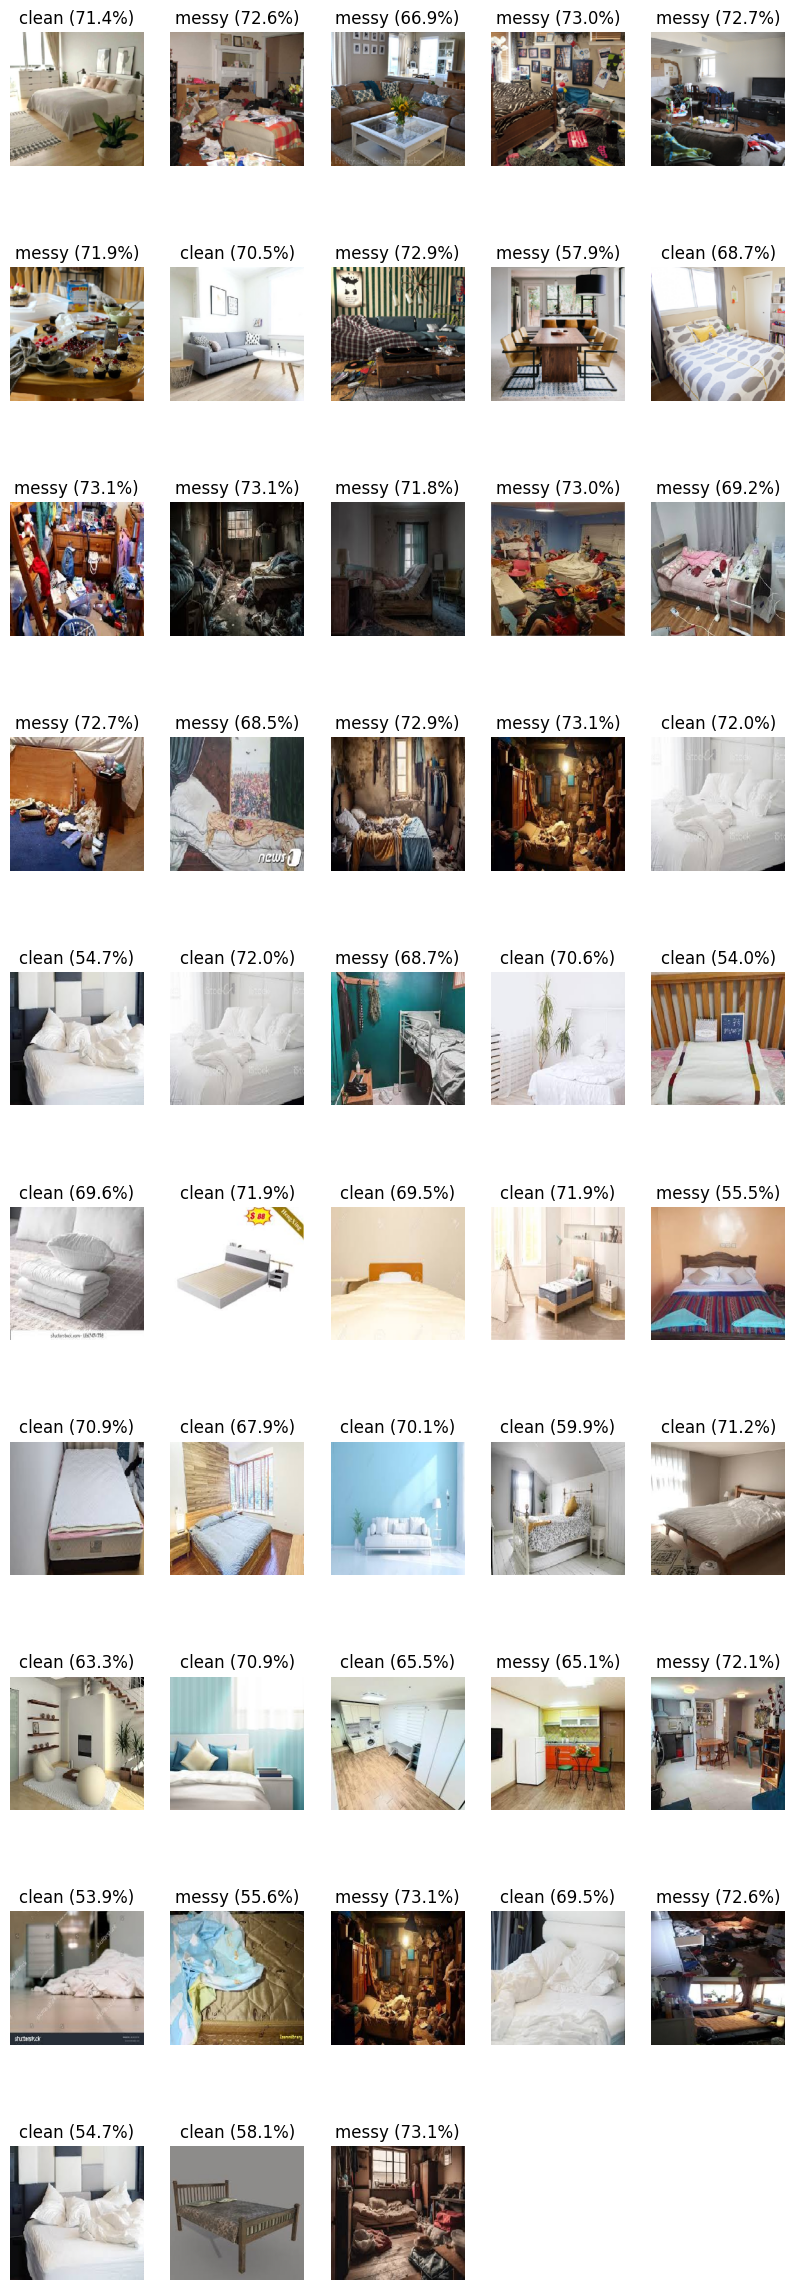

In [10]:
# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# 테스트 이미지 예측 및 시각화
test_images = list(test_data_dir.glob('*_converted.png'))

plt.figure(figsize=(10, 30))

for i, img_path in enumerate(test_images):
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # 모델 예측
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    plt.subplot(10, 5, i + 1)
    plt.imshow(img)
    plt.title(class_names[np.argmax(score)] + ' (' + str(round(100 * np.max(score), 1)) + '%)')
    plt.axis("off")

plt.show()

In [ ]:
#from PIL import Image
#import glob

# 이미지 파일들의 경로
#image_paths = glob.glob('/content/drive/MyDrive/images/test/*.png')

# 각 이미지 파일을 PNG 형식으로 변환
#for img_path in image_paths:
#    img = Image.open(img_path)
#    png_path = img_path.replace('.png', '_converted.png')  # 변환된 이미지 파일 경로
#    img.save(png_path, 'PNG')